In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime
import glob
from pathlib import Path
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

DOWNLOAD_DIR = 'C:/entsoe-data'

This will import the data, you have to run it to be able to solve the homework.

In [16]:
def read_single_csv_entso_e(file):
    return pd.read_csv(file, sep='\t', encoding='utf-16', parse_dates=["DateTime"])


def load_complete_entso_e_data(directory):
    pattern = Path(directory) / '*.csv'
    files = glob.glob(str(pattern))

    if not files:
        raise ValueError(f"No files found when searching in {pattern}, wrong directory?")
    
    print(f'Concatenating {len(files)} csv files...')

    each_csv_file = [read_single_csv_entso_e(file) for file in files]
    data = pd.concat(each_csv_file, ignore_index=True)

    data = data.sort_values(by=["AreaName", "DateTime"])
    data = data.set_index("DateTime")

    print("Loading done.")

    return data


power_demand = load_complete_entso_e_data(DOWNLOAD_DIR)

Concatenating 68 csv files...
Loading done.


# Exercise 1 - Calculate the relation of Wednesday average consumption to Sunday average consumption for selected countries

In this exercise, calculate the relation of Wednesday average consumption to Sunday average consumption for the following countries: Austria, Germany, United Kingdom, Spain, Sweden, Italy, Croatia.

(1) First create a variable that contains only power consumption data for these countries. The pandas command ```isin()``` may be very helpful here. Reduce the data to only consider the period 2015-01-01 until 2019-12-31. The lecture slides may contain relevant code here.

(2) Then, group the data by weekday and country (i.e. AreaName). Use ```groupby``` and ```mean```for that purpose. 

(3) Calculate for all countries the proportion of Wednesday (day 2) and Sunday (day 6) by dividing the two values.

(4) For which country, this relative value is highest? What could this indicate?

In [17]:
power_demand.columns

Index(['Year', 'Month', 'Day', 'ResolutionCode', 'areacode', 'AreaTypeCode',
       'AreaName', 'MapCode', 'TotalLoadValue', 'UpdateTime'],
      dtype='object')

In [18]:
countries = power_demand['AreaName'].isin(['Austria', 'Germany', 'United Kingdom', 'Spain', 'Sweden', 'Italy', 'Croatia'])
power_demand_countries = power_demand[countries]
power_demand_selected = power_demand_countries['2015-01-01':'2019-12-31']

In [19]:
power_demand_selected

,Year,Month,Day,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
DateTime,,,,,,,,,,
2015-01-01 00:00:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6017.2,2017-09-14 04:00:15
2015-01-01 00:15:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5966.8,2017-09-14 04:00:15
2015-01-01 00:30:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5935.6,2017-09-14 04:00:15
2015-01-01 00:45:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5934.4,2017-09-14 04:00:15
2015-01-01 01:00:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5750.8,2017-09-14 04:00:15
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00,2019,12,31,PT30M,GB,CTY,United Kingdom,GB,34772.0,2020-01-06 22:16:17
2019-12-31 22:00:00,2019,12,31,PT30M,GB,CTY,United Kingdom,GB,32305.0,2020-01-06 22:16:17
2019-12-31 22:30:00,2019,12,31,PT30M,GB,CTY,United Kingdom,GB,31521.0,2020-01-06 22:16:17


In [20]:
power_demand_weekday = power_demand_selected.groupby([power_demand_selected.index.weekday, 'AreaName']).mean()

In [21]:
power_demand_wednesday = power_demand_weekday.loc[2, 'TotalLoadValue']
power_demand_sunday = power_demand_weekday.loc[6, 'TotalLoadValue']
power_demand_wednesday

AreaName
Austria            7597.097115
Croatia            2072.242308
Germany           59894.796293
Italy             35925.647596
Spain             30108.756696
Sweden            16188.529006
United Kingdom    37681.473124
Name: TotalLoadValue, dtype: float64

In [22]:
power_demand_sunday

AreaName
Austria            5982.295785
Croatia            1802.134738
Germany           46127.261956
Italy             26104.259419
Spain             24857.647031
Sweden            14489.429647
United Kingdom    33251.563333
Name: TotalLoadValue, dtype: float64

In [23]:
relation_wed_sun = power_demand_wednesday / power_demand_sunday
relation_wed_sun

AreaName
Austria           1.269930
Croatia           1.149882
Germany           1.298468
Italy             1.376237
Spain             1.211247
Sweden            1.117265
United Kingdom    1.133224
Name: TotalLoadValue, dtype: float64

In [24]:
highest_relation = relation_wed_sun.idxmax()
highest_relation

'Italy'

Italy has the highest relative value -> The power consumption in Italy is much higher on Wednesday than on Sunday, probably because most of the shops and companies are closed on Sunday. Italy is a religious country, which might be another reason for the fewer power consumption on Sundays. Because of the warmer seasons during the year, people tend to spend more time outside, especially on Sunday when they don't have to work - households consume less energy. 

# Exercise 2 - Calculate the monthly average consumption as deviation from mean consumption

For the same countries as in the above dataset, calculate the monthly mean consumption as deviation from the mean of consumption over the whole time. Plot the curves for all countries.

(1) First create a variable that contains only power consumption data for the selected countries. The pandas command ```isin()``` may be very helpful here. If you did Exercise 1, you can use the same dataset.

(2) Then, aggregate the data by country (i.e. AreaName) and month. Use ```groupby``` and ```mean``` for that purpose. Select the column ```TotalLoadValue``` from the result.

(3)  Aggregate the data by country (i..e AreaName) only, i.e. calculate the average consumption by country using ```groupby``` and ```mean```. Select the column ```TotalLoadValue``` from the result.

(4) Divide the result of (2) by (3) and observe how well broadcasting works here.

(5) Use the command ```unstack``` on the result. How does the table look now? Plot the result. If your resulting, unstacked dataframe is called ```result```, you may use ```result.plot()``` to get a nice plot.

(6) How would you explain the difference in the curve between Croatia and Sweden?


In [25]:
power_demand_monthly = power_demand_countries.groupby([power_demand_countries.index.month, 'AreaName']).mean()
power_demand_monthly = power_demand_monthly['TotalLoadValue']
power_demand_monthly

DateTime  AreaName      
1         Austria            7950.379010
          Croatia            2168.034050
          Germany           59446.334530
          Italy             34025.931676
          Spain             30523.615229
                                ...     
12        Germany           56845.299636
          Italy             32589.833916
          Spain             28539.761810
          Sweden            18056.958889
          United Kingdom    38694.120942
Name: TotalLoadValue, Length: 84, dtype: float64

In [26]:
power_demand_average = power_demand_countries.groupby(['AreaName']).mean()
power_demand_average = power_demand_average['TotalLoadValue']
power_demand_average

AreaName
Austria            7117.496779
Croatia            1998.053066
Germany           55852.646350
Italy             32948.027273
Spain             28525.867365
Sweden            15723.579332
United Kingdom    36218.496332
Name: TotalLoadValue, dtype: float64

In [27]:
power_demand_monthly_average = power_demand_monthly/power_demand_average

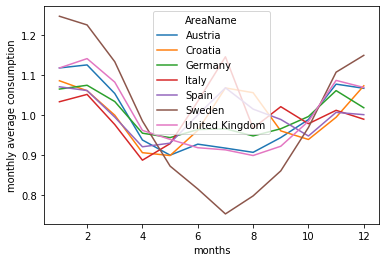

Text(0, 0.5, 'monthly average consumption')

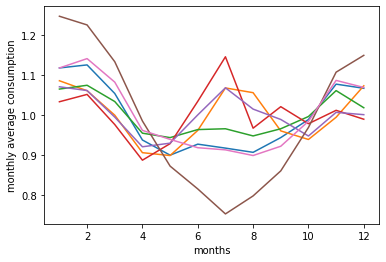

In [28]:
result = power_demand_monthly_average.unstack()
result.plot()
plt.xlabel('months')
plt.ylabel('monthly average consumption')
plt.show()

plt.plot(result)
plt.xlabel('months')
plt.ylabel('monthly average consumption')

Difference between Croatia and Sweden: Sweden has the highest consumption during the winter months of all the countries probably because of the short days and less sunlight. The consumption during summer in Sweden is the lowest probably because of the long days. Croatia has a high consumption during the summer months because of the tourists and the air conditioning. 

# Exercise 3 - calculate the hourly average consumption as deviation from mean consumption

Do the same as in exercise 2, but now for the hourly average consumption. I.e. how much is consumed on each of the 24 hours of a day?

Which country has the lowest, which the highest variability? What may be the reason for it?

In [29]:
power_demand_hourly = power_demand_countries.groupby([power_demand_countries.index.hour, 'AreaName']).mean()
power_demand_hourly = power_demand_hourly['TotalLoadValue']

power_demand_average = power_demand_countries.groupby(['AreaName']).mean()
power_demand_average = power_demand_average['TotalLoadValue']

power_demand_hourly_average = power_demand_hourly/power_demand_average

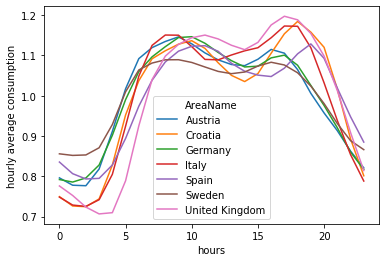

In [30]:
result_hours = power_demand_hourly_average.unstack()

result_hours.plot()
plt.xlabel('hours')
plt.ylabel('hourly average consumption')
plt.show()

In [31]:
hours_country = result_hours.std()
print(hours_country)

AreaName
Austria           0.129944
Croatia           0.155232
Germany           0.127109
Italy             0.164017
Spain             0.119016
Sweden            0.091390
United Kingdom    0.177716
dtype: float64


In [32]:
print('\nhighest deviation:\n', hours_country[hours_country == hours_country.max()])
print('\nlowest deviation:\n', hours_country[hours_country == hours_country.min()])


highest deviation:
 AreaName
United Kingdom    0.177716
dtype: float64

lowest deviation:
 AreaName
Sweden    0.09139
dtype: float64


Sweden has the lowest deviation of the countries -> there is not a big difference between the energy consumption during the day and at night, probably because of the long or very short days 
UK has the highest deviation -> big difference between the energy consumption during day and night, highest consumption around 7, maybe because they spend more time inside, colder weather, tv... 

# Exercise 4 - Calculate the average load per capita

Below you find a table with population data for our selected countries. You should use it to calculate per capita consumption.

(1) Calculate the average load in all countries using ```groupby``` and ```mean``` and select the column ```TotalLoadValue``` from the result.

(2) Divide the result by the ```Population``` column of the dataframe ```population```. Observe, how broadcasting helps here nicely.

(3) Plot the result. Which country has the highest load, which the lowest? What may be the reason? In which unit is this value? How could we convert it to MWh per year?

In [33]:
population = pd.DataFrame({'Country': ["Austria", "Croatia", "Germany", "Italy", "Spain", "Sweden", "United Kingdom"],
             'Population': [8840521, 4087843, 82905782, 60421760, 46796540, 10175214, 66460344]})

population.index = population["Country"]

population

,Country,Population
Country,,
Austria,Austria,8840521
Croatia,Croatia,4087843
Germany,Germany,82905782
Italy,Italy,60421760
Spain,Spain,46796540
Sweden,Sweden,10175214
United Kingdom,United Kingdom,66460344


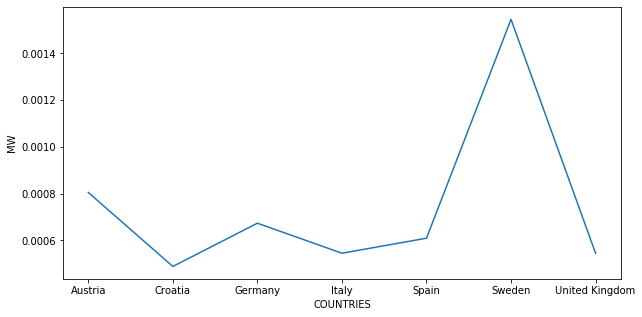

AreaName
Austria           0.000805
Croatia           0.000489
Germany           0.000674
Italy             0.000545
Spain             0.000610
Sweden            0.001545
United Kingdom    0.000545
dtype: float64

highest load:
 AreaName
Sweden    0.001545
dtype: float64

lowest load:
 AreaName
Croatia    0.000489
dtype: float64


In [47]:
average_load = power_demand_countries.groupby(['AreaName']).mean()
average_load = average_load['TotalLoadValue']

average_load_capita = average_load / population['Population']

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(average_load_capita)
ax.set_xlabel('COUNTRIES')
ax.set_ylabel('MW')
plt.show()

print(average_load_capita)
print('\nhighest load:\n', average_load_capita[average_load_capita == average_load_capita.max()])
print('\nlowest load:\n', average_load_capita[average_load_capita == average_load_capita.min()])

Sweden has the highest average consumption per capita, Croatia has the lowest. 
Sweden -> cold temperatures, so higher consumption at households
Croatia -> warmer temperatures, so less consumption 

TotalLoad in MW -> 1MW *24h * 365d = 1 MWh per year 